<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Описание тарифов

**Тариф «Смарт»**
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

**Примечание**
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

## Описание таблиц

**Таблица users (информация о пользователях):**

user_id — уникальный идентификатор пользователя

age — возраст пользователя (годы)

churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

city — город проживания пользователя

first_name — имя пользователя

last_name — фамилия пользователя

reg_date — дата подключения тарифа (день, месяц, год)

tarif — название тарифного плана

**Таблица calls (информация о звонках):**

id — уникальный номер звонка

call_date — дата звонка

duration — длительность звонков в минутах

user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**

id — уникальный номер сообщения

message_date — дата сообщения

user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**

id — уникальный номер сессии

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

session_date — дата интернет-сессии

user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**

messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

rub_monthly_fee — ежемесячная абонентская плата в рублях

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со - 101 минуты будет взиматься плата)

tariff_name — название тарифа

## Шаг 1. Изучение данных

## Шаг 2. Подготовка данных
1. Приведение данных к нужным типам
2. Исправление ошибок
3. Подсчет для каждого пользователя
 - количество сделанных звонков и израсходованных минут разговора по месяцам;
 - количество отправленных сообщений по месяцам;
 - объем израсходованного интернет-трафика по месяцам;
 - помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

## Шаг 3. Анализ данных
Описание поведения клиентов оператора, исходя из выборки. 
Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
- Среднее количество
- Дисперсия 
- Стандартное отклонение. 
Гистограммы. 
Описания распределений

## Шаг 4. Проверка гипотез
- Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

## Шаг 5. Общий вывод

## Изучение данных

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

In [2]:
#открытие датасетов
try:
    users = pd.read_csv('/Users/maria/Documents/Практикум/проект 4/users.csv')
    calls = pd.read_csv('/Users/maria/Documents/Практикум/проект 4/calls.csv')
    messages = pd.read_csv('/Users/maria/Documents/Практикум/проект 4/messages.csv')
    internet = pd.read_csv('/Users/maria/Documents/Практикум/проект 4/internet.csv')
    tariffs = pd.read_csv('/Users/maria/Documents/Практикум/проект 4/tariffs.csv')

except:
    users = pd.read_csv('/datasets/users.csv')
    calls = pd.read_csv('/datasets/calls.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')

Рассмотрим датасет users

In [3]:
#просмотр общей информации о датасете users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Оценка для user_id не имеет смысла, поскольку эти номера - обозначения пользователей, но столбец age выглядит логично

In [5]:
#просмотр первых 10-ти строк датасета users
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [6]:
#проверим датасет users на пропуски
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Пропуски представлены только в столбце churn_date (дата прекращения использования тарифа). Это логично, пропуски представлены у абонентов, которые не прекращали использование. На данном этапе непонятно требуется ли замена пропусков в этом столбце и на что лучше эти пропуски заменить, так что требуется пока оставить как есть.

In [7]:
#проверим датасет users на явные дубликаты
users.duplicated().sum()

0

Дубликаты не найдены. Датасет users готов к обработке

**Вывод** В датасете users представлены данные по пользователям - абонентам оператора. Датасет состоит из 8-ми столбцов и включает персональный номер, возраст, город, имя, фамилию, дату регистрации и расторжения договора и название тарифа

Рассмотрим датасет calls

In [8]:
#просмотр общей информации о датасете calls
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [10]:
#просмотр первых 10-ти строк датасета calls
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [11]:
#проверим датасет calls на пропуски
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

Пропусков нет, все данные загружены.


In [12]:
#проверим датасет calls на явные дубликаты
calls.duplicated().sum()

0

Явные дубликаты не найдены

Теперь данные выглядят обработанными, но смущают звонки продолжительностью 0 минут. Необходимо учитывать это в ходе исследования

Данные в датасете calls представляют собой информацию о продолжительности звонков респондентов и включают следующие столбцы: персональный номер, дату звонка, продолжительность

Рассмотрим датасет messages

In [13]:
#просмотр общей информации о датасете calls
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [14]:
#просмотр первых 10-ти строк датасета messages
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [15]:
#проверим датасет messages на пропуски
messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

Пропуски в данных не обнаружены

In [16]:
#проверим датасет messages на явные дубликаты
messages.duplicated().sum()

0

Явные дубликаты не обнаружены

Данные в датасете messages представляют собой информацию о сообщениях респондентов и включают следующие столбцы: персональный номер, количество смс

Рассмотрим датасет internet

In [17]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Необходимо обратить внимание, что сумма указана в мегабайтах, не гигабайтах, чтобы в дальнейшем это не повредило расчетам

In [18]:
#просмотр первых 10-ти строк датасета internet
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [19]:
#проверим датасет internet на пропуски
internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

Пропуски в данных не обнаружены

In [20]:
#проверим датасет internet на явные дубликаты
internet.duplicated().sum()

0

Явные дубликаты не обнаружены

Данные в датасете internet представляют собой информацию об использовании интернета респондентами и включают следующие столбцы: персональный номер, количество мегабайт интернета, дата подключения

Рассмотрим датасет tariffs

In [21]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Данные выглядят корректно, на первый взгляд изменение типов данных не требуется. В датасете две строки, названия тарифов

In [22]:
#просмотр строк датасета tariffs
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [23]:
#проверим датасет tariffs на пропуски
tariffs.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

Пропуски в данных не обнаружены

In [24]:
#проверим датасет tariffs на явные дубликаты
tariffs.duplicated().sum()

0

Явные дубликаты не обнаружены

Данные в датасете tariffs представляют собой данные о двух тарифах оператора и включают целевые значения тарифов: количество доступных минут, интернета, сообщений, а также названия

## Подготовка данных

**Приведение данных к нужным типам и исправление ошибок**

In [25]:
#приведем даты в датасете users к формату to.datetime
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

In [26]:
#приведем даты к формату to.datetime
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")

In [27]:
#по условию оператор округляет значения до целых чисел, приведем столбец duration к целым числам
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [28]:
#id обозначен как объект, стоит привести к числам для удобства работы
calls['id'] = calls['id'].astype('int')

In [29]:
#приведем даты к формату to.datetime
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

In [30]:
#id обозначен как объект, стоит привести к числам для удобства работы
messages['id'] = messages['id'].astype('int')

In [31]:
#приведем даты к формату to.datetime
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")

In [32]:
#id обозначен как объект, стоит привести к числам для удобства работы
internet['id'] = internet['id'].astype('int')

In [33]:
# создание столбца tariff (для того чтобы можно былбо объединить таблицы)
tariffs['tariff'] = tariffs['tariff_name']

In [34]:
# удаление дублированного столбца
del tariffs['tariff_name']

**Подсчет для каждого пользователя**
 - количество сделанных звонков и израсходованных минут разговора по месяцам;
 - количество отправленных сообщений по месяцам;
 - объем израсходованного интернет-трафика по месяцам;
 - помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [35]:
#подсчет количества сделанных звонков и израсходованных минут разговора по месяцам
calls['month'] = calls['call_date'].dt.month
calls_report = calls.groupby(['user_id', 'month']).agg({'duration':'sum', 'id':'count'}).reset_index().rename(columns={'id':'calls_during_month'})

In [36]:
calls_report.sample(10)

,user_id,month,duration,calls_during_month
1011,1161,11,39,6
1762,1282,8,672,94
2058,1329,11,475,80
1507,1241,8,178,31
1128,1178,11,328,50
906,1146,9,424,60
788,1125,12,317,37
1391,1221,6,256,33
1039,1168,2,884,123
454,1071,6,313,46


**Количество отправленных сообщений по месяцам**

In [37]:
#подсчет количества отправленных сообщений по месяцам
messages['month'] = messages['message_date'].dt.month
messages_report = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index().rename(columns={'id':'messages_during_month'})

In [38]:
messages_report.sample(10)

,user_id,month,messages_during_month
325,1059,11,24
1177,1227,2,27
1593,1308,11,31
2609,1480,9,19
840,1158,12,48
355,1065,11,56
1909,1365,10,1
2470,1457,8,26
1517,1294,10,20
684,1127,6,87


**Объем израсходованного интернет-трафика по месяцам**

In [39]:
internet['month'] = internet['session_date'].dt.month
internet_report = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index().rename(columns={'mb_used':'gb_during_month'})
#приведем мегабайты к гигабайтам
internet_report['gb_during_month']=internet_report['gb_during_month']/1024
#округлим гигабайты до большего согласно условию
internet_report['gb_during_month']=np.ceil(internet_report['gb_during_month'])

In [40]:
internet_report.sample(10)

,user_id,month,gb_during_month
1702,1269,9,17.0
2817,1437,11,21.0
1269,1198,9,18.0
1236,1192,12,9.0
1213,1188,8,11.0
2675,1419,9,14.0
355,1056,6,12.0
621,1098,10,21.0
841,1132,12,17.0
1503,1238,5,14.0


**Помесячная выручка с каждого пользователя**
(вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану)

In [41]:
#сбор данных calls_report, messages_report в один датасет
revenue_data = calls_report.merge(messages_report, on=['user_id','month'], how='outer')

In [42]:
#сбор данных calls_report, messages_report, internet_report в один датасет
revenue_data = revenue_data.merge(internet_report, on=['user_id','month'], how = 'outer')

In [43]:
revenue_data.sample(10)

,user_id,month,duration,calls_during_month,messages_during_month,gb_during_month
1516,1243,8,395.0,51.0,82.0,24.0
2734,1429,9,138.0,29.0,NaN,18.0
599,1096,10,311.0,41.0,98.0,14.0
2114,1338,5,153.0,23.0,21.0,12.0
1022,1164,9,281.0,46.0,40.0,20.0
1157,1183,9,536.0,81.0,34.0,13.0
690,1111,11,347.0,53.0,2.0,12.0
800,1126,12,614.0,84.0,3.0,33.0
465,1072,10,517.0,67.0,16.0,23.0
2989,1469,12,635.0,106.0,NaN,28.0


In [44]:
#добавим данные из других датасетов к общему датасету
revenue_data = revenue_data.merge(users, on='user_id')
revenue_data.sample(5)

,user_id,month,duration,calls_during_month,messages_during_month,gb_during_month,age,churn_date,city,first_name,last_name,reg_date,tariff
2459,1390,8,224.0,29.0,27.0,18.0,56,NaT,Санкт-Петербург,Лидия,Беляева,2018-07-30,smart
349,1055,9,465.0,65.0,31.0,19.0,39,NaT,Казань,Луиза,Березина,2018-01-02,smart
3101,1484,9,529.0,64.0,107.0,15.0,55,NaT,Екатеринбург,Илзе,Абалдуева,2018-08-04,smart
2929,1460,8,537.0,89.0,53.0,16.0,64,NaT,Ижевск,Арина,Абашкина,2018-04-06,smart
870,1142,8,354.0,59.0,43.0,20.0,51,NaT,Новосибирск,Симона,Алешкова,2018-03-24,smart


In [45]:
revenue_data = revenue_data.merge(tariffs, on='tariff', how='left')
revenue_data.sample(5)

,user_id,month,duration,calls_during_month,messages_during_month,gb_during_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
1914,1306,12,484.0,66.0,NaN,35.0,21,NaT,Чита,Радим,Попов,2018-11-30,smart,50,15360,500,550,200,3,3
2280,1365,12,782.0,111.0,43.0,30.0,38,NaT,Ростов-на-Дону,Георгий,Вишняков,2018-10-31,smart,50,15360,500,550,200,3,3
323,1052,9,816.0,107.0,80.0,21.0,52,NaT,Санкт-Петербург,Павел,Панов,2018-07-27,smart,50,15360,500,550,200,3,3
606,1097,10,645.0,81.0,38.0,9.0,29,NaT,Краснодар,Алла,Кулешова,2018-06-25,ultra,1000,30720,3000,1950,150,1,1
3070,1481,3,382.0,50.0,14.0,18.0,70,NaT,Москва,Клавдия,Чижова,2018-02-26,smart,50,15360,500,550,200,3,3


In [46]:
#проверка данных на пропуски
revenue_data.isna().sum()

user_id                     0
month                       0
duration                   40
calls_during_month         40
messages_during_month     497
gb_during_month            11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [47]:
#заполним пропуски в duration, calls_during_month, messages_during_month, mb_during_month значениями 0, 
#эти респонденты не использовали звонки, смс, интернет соответственно
revenue_data['duration'] = revenue_data['duration'].fillna(0)
revenue_data['calls_during_month'] = revenue_data['calls_during_month'].fillna(0)
revenue_data['messages_during_month'] = revenue_data['messages_during_month'].fillna(0)
revenue_data['gb_during_month'] = revenue_data['gb_during_month'].fillna(0)
#повторная проверка данных на пропуски
revenue_data.isna().sum()

user_id                     0
month                       0
duration                    0
calls_during_month          0
messages_during_month       0
gb_during_month             0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Пропуски в столбце churn_date означают, что это действующий абонент, который не расторгал договор. На данном этапе непонятно требуется ли замена пропусков в этом столбце и на что лучше эти пропуски заменить, так что требуется пока оставить как есть.

In [48]:
#проверка данных на явные дубликаты
revenue_data.duplicated().sum()

0

Явные дубликаты не найдены

In [49]:
#рассчитаем заплаченное клиентами сверх тарифа
def over_tariff(row):
    minutes = (row['calls_during_month'] - row['minutes_included']) * row['rub_per_minute']
    messages = (row['messages_during_month'] - row['messages_included']) * row['rub_per_message']
    gb = np.ceil((row['gb_during_month'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024)
    total = 0
    for i in [minutes, messages, gb]:
        if i > 0:
            total += i
    return total
revenue_data['over_tariff'] = revenue_data.apply(lambda x: over_tariff(x), axis=1)
#рассчитаем общую сумму оплаты по тарифу + сверх тарифа
revenue_data['paid_total'] = revenue_data['rub_monthly_fee'] + revenue_data['over_tariff']

In [50]:
revenue_data.sample(10)

,user_id,month,duration,calls_during_month,messages_during_month,gb_during_month,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_tariff,paid_total
3033,1476,7,492.0,65.0,3.0,16.0,50,NaT,Москва,Валентина,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
3149,1495,9,813.0,112.0,82.0,33.0,65,NaT,Иркутск,Авксентий,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
3120,1490,8,346.0,45.0,50.0,17.0,30,NaT,Москва,Радомир,...,smart,50,15360,500,550,200,3,3,0.0,550.0
2117,1338,8,151.0,26.0,23.0,17.0,64,NaT,Москва,Павел,...,smart,50,15360,500,550,200,3,3,0.0,550.0
3189,1106,9,0.0,0.0,23.0,22.0,67,NaT,Калуга,Исаак,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
1623,1262,3,174.0,25.0,22.0,11.0,21,NaT,Ульяновск,Антонина,...,smart,50,15360,500,550,200,3,3,0.0,550.0
31,1005,2,456.0,69.0,38.0,8.0,67,NaT,Набережные Челны,Афанасий,...,smart,50,15360,500,550,200,3,3,0.0,550.0
1455,1230,11,356.0,45.0,13.0,20.0,44,NaT,Томск,Ренальд,...,smart,50,15360,500,550,200,3,3,0.0,550.0
1838,1293,11,174.0,26.0,22.0,9.0,39,2018-11-22,Санкт-Петербург,Эдита,...,smart,50,15360,500,550,200,3,3,0.0,550.0
245,1039,8,398.0,66.0,119.0,25.0,40,NaT,Ярославль,Агнесса,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0


In [55]:
#подсчет общей выручки от двух тарифов
revenue_data_grouped_1 = revenue_data.pivot_table(index='tariff', values='paid_total', aggfunc='sum')
revenue_data_grouped_1

,paid_total
tariff,
smart,1264734.0
ultra,1920750.0


Согласно сводной таблице общая выручка от тарифа Ultra превышает выручку тарифа Smart практически в полтора раза.

In [56]:
#подсчет общей помесячной вырчуки от двух тарифов
revenue_data_grouped_2 = revenue_data.pivot_table(index='month', columns='tariff', values='paid_total', aggfunc='sum')
revenue_data_grouped_2

tariff,smart,ultra
month,,
1,18772.0,17550.0
2,32221.0,46800.0
3,43508.0,72150.0
4,62833.0,107250.0
5,79812.0,130650.0
6,92990.0,163800.0
7,114039.0,177450.0
8,133660.0,208650.0
9,147434.0,224250.0


Помесячные показатели выручки также уточняют, что в каждом месяце выручка от тарифа Ultra была выше.

**Вывод** 
Данные обработаны и приведены к нужным типам, пропуски устранены, данные проверены на явные дубликаты.
Необходимые столбцы добавлены в таблицу

## Анализ данных

Описание поведения клиентов оператора, исходя из выборки. 
Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
- Среднее количество
- Дисперсия 
- Стандартное отклонение. 
Гистограммы. 
Описания распределений

In [46]:
#посмотрим разбивку по тарифам
revenue_data['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

Прежде всего, необходимо посмотреть на поведение потребителей по каждому тарифу в отдельности (на звонки, смс, интернет, насколько выходят за объем тарифа.

In [47]:
#просмотр среднего, дисперсии, стандартного отклонения по тарифам
revenue_data.groupby('tariff').agg({'paid_total':['median','mean','std', 'var']}).style.format("{:.5f}")

В сводной таблице видно, что медианное значение оплаты пользователями тарифа Ultra равно стоимости этого тарифа, в то время как медианное значение тарифа смарта превышает стоимость тарифа в полтора раза, что означает, что пользователи пользуются дополнительными пакетами и переплачивают гораздо чаще. 
Дисперсия и квадратное отклонение у пользователей тарифа smart гораздо выше, они "не укладываются" в пакет тарифа чаще.

In [48]:
#просмотр среднего, дисперсии, квадратного отклонения по звонкам
revenue_data.groupby('tariff').agg({'duration':['median','mean','var','std']}).style.format("{:.5f}")

Построим также диаграмму для наглядности

Text(0.5, 1.0, 'Данные по звонкам, тариф Smart')

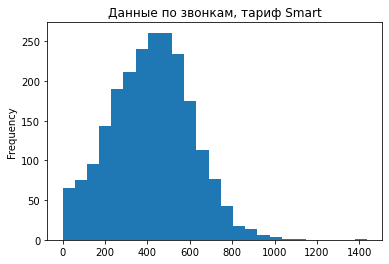

In [49]:
revenue_data[revenue_data['tariff'] == 'smart']['duration'].plot(kind='hist', bins=25)
plt.title('Данные по звонкам, тариф Smart')

Согласно данным таблицы и диаграммы, среднее количество минут в месяц у пользователей тарифа Smart = 422 минуты в месяц. В описании тарифа указано, что в тариф включено 500 минут разговора. Как видно на диаграмме бОльшая часть пользователей не использует "дополнительные минуты" и не платит за минуты сверх тарифа, но тем не менее есть пользователи (и такие пользователи не единичны), которые пользуются дополнительными минутами.

Теперь посмотрим на гистограмму тарифа Ultra

Text(0.5, 1.0, 'Данные по звонкам, тариф Ultra')

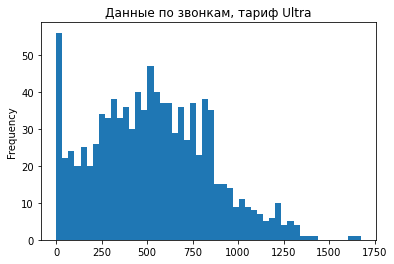

In [50]:
revenue_data[revenue_data['tariff'] == 'ultra']['duration'].plot(kind='hist', bins=50)
plt.title('Данные по звонкам, тариф Ultra')

Данные на этой гистограмме в большей степени разнятся от данных по тарифу Smart, что логично, этот тариф предусматривает 300 минут, то есть в 6 раз больше тарифа смарт. На диаграмме видно несколько пиков: мало минут (до 100), от 300 до 600 минут, от 800 до 900 минут в месяц. Эти пиковые значения встречаются чаще всего. Можно также сделать вывод, что, несмотря на то, что пиковые значения несколько смещают среднее и медиану выборки, дисперсия и стандартное отклонение валидны.  Также присутствуют и люди, говорящие до 1750 минут. Максимальные значения тарифа (3000) не представлены, то есть нет абонентов, которые говорят "сверх" пакета.

In [51]:
#просмотр среднего, медианы, максимального значения, дисперсии, квадратного отклонения по смс
revenue_data.groupby('tariff').agg({'messages_during_month':['median','mean','max','var','std']}).style.format("{:.5f}")

Медианное значение обоих тарифов не превышает количество смс, включенных в тариф (50 для Smart, 1000 для Ultra). Таблица также показывает, что в тарифе Ultra нет респондентов, которые использовали бы весь пакет смс, предложенный по тарифу. У пользователей тарифа Smart такие респонденты присутствуют.

Построим гистограмму для смс тарифа Smart

Text(0.5, 1.0, 'Данные по смс, тариф Smart')

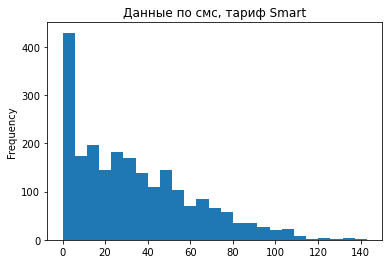

In [52]:
revenue_data[revenue_data['tariff'] == 'smart']['messages_during_month'].plot(kind='hist', bins=25)
plt.title('Данные по смс, тариф Smart')

Подтверждая данные сводной таблицы, мы видим, что небольшая часть пользователей пользуется дополнительным пакетом смс, отправляя до 143 смс в месяц.

Построим гистограмму для смс тарифа Ultra

Text(0.5, 1.0, 'Данные по смс, тариф Ultra')

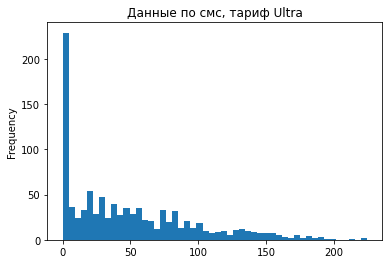

In [53]:
revenue_data[revenue_data['tariff'] == 'ultra']['messages_during_month'].plot(kind='hist', bins=50)
plt.title('Данные по смс, тариф Ultra')

Лишь малое число пользователей отправляет более 150 смс в месяц

In [54]:
#просмотр среднего, медианы, максимального значения, дисперсии, квадратного отклонения по смс
revenue_data.groupby('tariff').agg({'gb_during_month':['median','mean','max','var','std']}).style.format("{:.5f}")

Согласно данным, мы видим что медианное значение для тарифа Smart больше предложенного по тарифу (17/15 соответственно), то есть как минимум половина абонентов переиспользует тариф и покупает дополнительные гигабайты. Для тарифа Ultra медианное значение меньше предложенного по тарифу (19/30 соответственно), но дисперсия достаточно велика для этой выборки, а также максимальное значение больше значения, предложенного по тарифу (49/30 соответственно).

Построим гистограмму для потраченных гигабайт интернета пользователями тарифа Smart

Text(0.5, 1.0, 'Данные по интернету, тариф Smart')

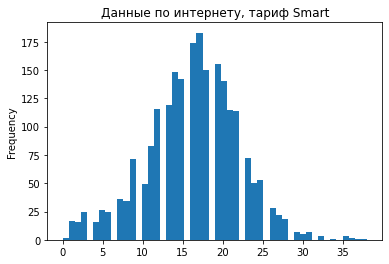

In [55]:
revenue_data[revenue_data['tariff'] == 'smart']['gb_during_month'].plot(kind='hist', bins=50)
plt.title('Данные по интернету, тариф Smart')

Гистограмма подтверждает данные сводной таблицы. При 15-ти включенных в тариф гигабайтах, более половины пользователей требуется больше интернета чем предложено по тарифу, они прибегают к покупке дополнительных пакетов.

Построим гистограмму для потраченных гигабайт интернета пользователями тарифа Ultra

Text(0.5, 1.0, 'Данные по интернету, тариф Ultra')

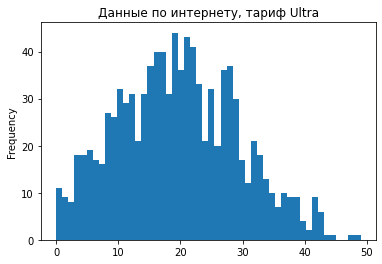

In [56]:
revenue_data[revenue_data['tariff'] == 'ultra']['gb_during_month'].plot(kind='hist', bins=50)
plt.title('Данные по интернету, тариф Ultra')

В тариф Ultra включено 30 гб. Как видно на гистограмме, более 50% пользователей не превышают пакет и не покупают интернет дополнительно.

In [76]:
revenue_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   duration               3214 non-null   float64       
 3   calls_during_month     3214 non-null   float64       
 4   messages_during_month  3214 non-null   float64       
 5   gb_during_month        3214 non-null   float64       
 6   age                    3214 non-null   int64         
 7   churn_date             187 non-null    datetime64[ns]
 8   city                   3214 non-null   object        
 9   first_name             3214 non-null   object        
 10  last_name              3214 non-null   object        
 11  reg_date               3214 non-null   datetime64[ns]
 12  tariff                 3214 non-null   object        
 13  mes

**Вывод**
Пользователи тарифа Smart чаще превышают предложение тарифа и докупают услуги дополнительно по своим нуждам, чем абоненты тарифа Ultra.
Примечательно то, что при оценки среднего, медианного значений, дисперсии и стандартного отклонения обоих тарифов видно, что большинство пользователей осознанно переплачивают за тариф Smart, а не покупают тариф Ultra, поскольку, даже с учетом переплат, такой вариант является более выгодным для них.

## Проверка гипотез

In [57]:
# для проверки гипотез потребуется функция, органичивающая выбросы. Оставим данные между первым и третьим квантилями
def without_emissions(revenue_data, column, graphic=0, x = 10, y = 10):
    q1 = revenue_data[column].quantile(0.25)                 
    q3 = revenue_data[column].quantile(0.75)
    base = q3 - q1
    filtered_emissions = (revenue_data[column] >= (q1 - 1.5 * base)) & (revenue_data[column] <= (q3 + 1.5 * base))
    if graphic == 1:
        return revenue_data.loc[filtered_emissions].boxplot([column], figsize=(x,y))
    else:
        return revenue_data.loc[filtered_emissions]

Гипотеза **Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**


H0: Средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются.

H1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Выборки независимы, так что можно применить t-test (Гипотезу о равенстве средних двух генеральных совокупностей),  этот метод используется когда нужно сравнить средние двух генеральных совокупностей между собой.

Перед t-тестом необходимо подтвердить, что выборки релевантны, поскольку соблюдаются три аспекта:
1. Генеральные совокупности не зависят друг от друга
2. Выборочные средние нормально распределены
3. Дисперсии рассматриваемых генеральных совокупностей не равны, поэтому предполагается использование параметра equal_var=False

In [58]:
#обозначим значения столбца в отдельную переменную для работы
tariff_smart = revenue_data[revenue_data['tariff'] == 'smart']
tariff_ultra = revenue_data[revenue_data['tariff'] == 'ultra']
#удаляем выбросы
tariff_smart = without_emissions(tariff_smart, 'paid_total', 0)
tariff_smart = tariff_smart['paid_total']
tariff_ultra = without_emissions(tariff_ultra, 'paid_total', 0)
tariff_ultra = tariff_ultra['paid_total'] 
#ставим минимальную alpha, чтобы увидеть разброс
alpha = 0.01
tariff_results = st.ttest_ind(tariff_smart, tariff_ultra, equal_var=False)

display('p-value:', tariff_results.pvalue)

if (tariff_results.pvalue < alpha):
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-value:'

0.0

'Отвергаем нулевую гипотезу'

**Вывод** 

Гипотеза H0 (H0: Средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются) должна быть отвергнута, что значит что гипотеза H1 (Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются) не может быть отвергнута. должна быть отвергнута, что значит что гипотеза H1 (Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются) не может быть отвергнута.

Гипотеза **Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.**

H0: Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

H1: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [59]:
#отсортируем список уникальных значений городов
revenue_data['city'].sort_values(ascending=True).unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

Неявные дубликаты не найдены. Для дальнейшей работы необходимо создать новый столбец и отделить респондентов из Москвы от других респондентов.

In [60]:
#отделяем Москву от не-Москвы в столбце
revenue_data['area']=np.where(revenue_data['city'] == 'Москва', 'Москва', 'Не Москва')
#добавляем респондентов из Москвы и не из Москвы в отдельные переменные
moscow = revenue_data[revenue_data['area'] == 'Москва']
not_moscow = revenue_data[revenue_data['area'] == 'Не Москва']
#удаляем выбросы
moscow = without_emissions(moscow, 'paid_total', 0)
moscow = moscow['paid_total']
not_moscow = without_emissions(not_moscow, 'paid_total', 0)
not_moscow = not_moscow['paid_total']
#проведение t-теста
city_results = st.ttest_ind(moscow, not_moscow, equal_var=False)
#ставим минимальную alpha, чтобы увидеть разброс
alpha = 0.01
display('p-значение:', city_results.pvalue)

if (city_results.pvalue < alpha):
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-значение:'

0.0007144727255639525

'Отвергаем нулевую гипотезу'

**Вывод**

Гипотеза H0 (Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов) должна быть отвергнута, так что гипотеза H1 (Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов) не может быть отвергнута.

## Общий вывод

Тарифы собраны таким образом, что тариф Smart недостаточен для многих потребителей (они переиспользуют преимущественно пакет минут и интернета, смс в меньшей степени), в то время как тариф Ultra слишком дорогой и избыточен (люди не используют пакет минут и смс полностью, интернет используют в большей степени). 

Смс-сообщения - наименее переиспользуемый компонент тарифа, для многих потребителей он избыточен в обоих тарифах.

Гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются" не может быть отвергнута.

Гипотеза "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" также не может быть отвергнута.


Медианная выручка оператора от тарифа "Ultra" больше медианной выручки тарифа "Smart". Это выглядит более привлекательно в долгосрочной перспективе, поскольку принесет компании больше средств. В то же время, многие пользователи недоиспользуют тариф "Ultra", что грозит появлением мнения среди пользователей, что тариф неоправданно дорог. 

Рассматривая показатели общей выручки (тариф Smart - 1264734 рублей, в то время как тариф Ultra - 1920750 рублей), можно сделать вывод, что тарифа Ultra принес бОльшую выручку, чем тариф Smart. Помесячная сводная таблицка выручки также подтверждает, что ежемесячно выручка от тарифа Ultra выше, чем от тарифа Smart.

Медианный платеж тарифа "Smart" значительно превышает стоимость тарифа, то есть многие пользователи покупают дополнительные "пакеты". Таким образом, можно сделать вывод, что клиенты приходят на тариф "Smart", но позднее переиспользуют его и присоединяются к тарифу "Ultra".

Хорошим вариантом решения может быть создание третьего, промежуточного тарифа, который бы включал больше минут и интернета, чем "Smart", но меньше чем "Ultra". Такой тариф позволил бы пользователям не беспокоиться из-за перплат по тарифу "Smart", что позволило бы им перейти на расширенный план, который в то же время не был бы избыточен, как план тарифа "Ultra".
